<a href="https://colab.research.google.com/github/santoshgurujula/Springboard/blob/master/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas -U

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.5)


In [2]:
# First, import the relevant modules
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import glob as gb
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#pointing the path to google drive folder
%cd '/content/drive/My Drive/Springboard/data'
!ls

/content/drive/My Drive/Springboard/data
BOM500002.csv  BOM500013.csv  fig2.png
BOM500003.csv  BOM500014.csv  FinalStockData.csv
BOM500008.csv  BOM500020.csv  interpolating-timeseries-p1-pandas-fig1.png
BOM500009.csv  BOM500023.csv  nasdl.csv
BOM500010.csv  DJI.csv
BOM500012.csv  fig1.png


In [4]:
#to read only BSE stock csv files
pattern='BOM*.csv'
#read csv files 
csv_files=gb.glob(pattern)

In [5]:
#print list of data files
print(csv_files)

['BOM500002.csv', 'BOM500003.csv', 'BOM500008.csv', 'BOM500009.csv', 'BOM500010.csv', 'BOM500013.csv', 'BOM500012.csv', 'BOM500014.csv', 'BOM500020.csv', 'BOM500023.csv']


In [6]:
# Copy multiple files to single DF
# Create an empty list: frames
frames = []



In [7]:
#varaibles to store no of rows and columns in data files, these variables will be used for validation
no_of_rows= 0
no_of_cols= 0
#variable to count no of data files
no_of_data_files=0

In [8]:
#  Iterate over csv_files
for csv in csv_files:
    #  Read csv into a DataFrame: df
    print('reading csv:',csv)
    df = pd.read_csv(csv)
    df.info()
    #count no of rows of data files
    no_of_rows+=df.shape[0]
    #count no of columns of data files
    no_of_cols+=df.shape[1]
    #incerement data file count
    no_of_data_files+=1
    # Append df to frames
    frames.append(df)
print('No of rows:',no_of_rows)
print('No of columns:',no_of_cols)

reading csv: BOM500002.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       862 non-null    object 
 1   Open                       862 non-null    float64
 2   High                       862 non-null    float64
 3   Low                        862 non-null    float64
 4   Close                      862 non-null    float64
 5   WAP                        862 non-null    float64
 6   No. of Shares              862 non-null    float64
 7   No. of Trades              862 non-null    float64
 8   Total Turnover             862 non-null    float64
 9   Deliverable Quantity       861 non-null    float64
 10  % Deli. Qty to Traded Qty  861 non-null    float64
 11  Spread H-L                 862 non-null    float64
 12  Spread C-O                 862 non-null    float64
 13  stockname              

# 1) File BOM500023.csv has only 606 rows, where as other data files has 739 rows
# 2) Deliverable Quantity is not available for all rows in CSV files
# 3) BOM500014.csv has 731 rows
# 4) In Some data files % Deli. Qty to Traded Qty is not available for some rows

In [9]:
# Concatenate frames into a single DataFrame: uber
share_price_df = pd.concat(frames)


In [10]:
# Print the shape of share_price_df
print(share_price_df.shape)
#Take no of rows and columns of concatenated DataFrame
no_of_concat_rows = share_price_df.shape[0]
no_of_concat_cols = share_price_df.shape[1]


(8449, 14)


In [11]:
#Validate the no rows in data file and concatenated rows are equal
assert no_of_concat_rows==no_of_rows
assert no_of_concat_cols*no_of_data_files==no_of_cols

In [12]:
# Print the head of share_price_df
print(share_price_df.head())


         Date    Open    High  ...  Spread H-L  Spread C-O  stockname
0  2020-06-30  925.00  948.15  ...       45.10       18.60  BOM500002
1  2020-06-29  915.00  929.00  ...       43.90        4.90  BOM500002
2  2020-06-26  888.00  927.00  ...       39.00       25.60  BOM500002
3  2020-06-25  870.00  895.00  ...       25.00       17.50  BOM500002
4  2020-06-24  854.65  886.70  ...       32.05       11.85  BOM500002

[5 rows x 14 columns]


In [13]:
print(share_price_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares',
       'No. of Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O', 'stockname'],
      dtype='object')


In [14]:
share_price_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares',
       'No. of Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O', 'stockname'],
      dtype='object')

In [15]:
#Sort based on date in ascending order
share_price_df=share_price_df.sort_values(['stockname','Date'],ascending=True)

In [16]:
#Pivot based on stockname for only Close price
share_price_pivot_df=share_price_df.pivot(index='Date', columns='stockname').reset_index()
share_price_pivot_df.head()

Date      Open            ... Spread C-O                    
stockname             BOM500002 BOM500003  ...  BOM500014 BOM500020 BOM500023
0          2017-01-02    1045.0    129.00  ...      -0.13     -0.25       NaN
1          2017-01-03    1069.9    132.30  ...      -0.04     -0.20      0.00
2          2017-01-04    1050.0    134.15  ...      -0.01      0.65       NaN
3          2017-01-05    1051.9    132.00  ...       0.07      2.60     -0.05
4          2017-01-06    1037.0    132.90  ...       0.09     -0.90       NaN

[5 rows x 121 columns]

In [17]:
share_price_pivot_df.columns

MultiIndex([(      'Date',          ''),
            (      'Open', 'BOM500002'),
            (      'Open', 'BOM500003'),
            (      'Open', 'BOM500008'),
            (      'Open', 'BOM500009'),
            (      'Open', 'BOM500010'),
            (      'Open', 'BOM500012'),
            (      'Open', 'BOM500013'),
            (      'Open', 'BOM500014'),
            (      'Open', 'BOM500020'),
            ...
            ('Spread C-O', 'BOM500002'),
            ('Spread C-O', 'BOM500003'),
            ('Spread C-O', 'BOM500008'),
            ('Spread C-O', 'BOM500009'),
            ('Spread C-O', 'BOM500010'),
            ('Spread C-O', 'BOM500012'),
            ('Spread C-O', 'BOM500013'),
            ('Spread C-O', 'BOM500014'),
            ('Spread C-O', 'BOM500020'),
            ('Spread C-O', 'BOM500023')],
           names=[None, 'stockname'], length=121)

In [18]:
#To convert Multi index to single index, convert each tuple to list and concatenate with _
columnnames=[]
for column in share_price_pivot_df.columns:
  #print(list(column))
  columnnames.append('_'.join(list(column)).rstrip('_'))
print(columnnames)

['Date', 'Open_BOM500002', 'Open_BOM500003', 'Open_BOM500008', 'Open_BOM500009', 'Open_BOM500010', 'Open_BOM500012', 'Open_BOM500013', 'Open_BOM500014', 'Open_BOM500020', 'Open_BOM500023', 'High_BOM500002', 'High_BOM500003', 'High_BOM500008', 'High_BOM500009', 'High_BOM500010', 'High_BOM500012', 'High_BOM500013', 'High_BOM500014', 'High_BOM500020', 'High_BOM500023', 'Low_BOM500002', 'Low_BOM500003', 'Low_BOM500008', 'Low_BOM500009', 'Low_BOM500010', 'Low_BOM500012', 'Low_BOM500013', 'Low_BOM500014', 'Low_BOM500020', 'Low_BOM500023', 'Close_BOM500002', 'Close_BOM500003', 'Close_BOM500008', 'Close_BOM500009', 'Close_BOM500010', 'Close_BOM500012', 'Close_BOM500013', 'Close_BOM500014', 'Close_BOM500020', 'Close_BOM500023', 'WAP_BOM500002', 'WAP_BOM500003', 'WAP_BOM500008', 'WAP_BOM500009', 'WAP_BOM500010', 'WAP_BOM500012', 'WAP_BOM500013', 'WAP_BOM500014', 'WAP_BOM500020', 'WAP_BOM500023', 'No. of Shares_BOM500002', 'No. of Shares_BOM500003', 'No. of Shares_BOM500008', 'No. of Shares_BOM50

In [19]:
#changing Index name to None 
share_price_pivot_df.columns.name = None
#rename column names
share_price_pivot_df.columns=columnnames
share_price_pivot_df.head()

,Date,Open_BOM500002,Open_BOM500003,Open_BOM500008,Open_BOM500009,Open_BOM500010,Open_BOM500012,Open_BOM500013,Open_BOM500014,Open_BOM500020,Open_BOM500023,High_BOM500002,High_BOM500003,High_BOM500008,High_BOM500009,High_BOM500010,High_BOM500012,High_BOM500013,High_BOM500014,High_BOM500020,High_BOM500023,Low_BOM500002,Low_BOM500003,Low_BOM500008,Low_BOM500009,Low_BOM500010,Low_BOM500012,Low_BOM500013,Low_BOM500014,Low_BOM500020,Low_BOM500023,Close_BOM500002,Close_BOM500003,Close_BOM500008,Close_BOM500009,Close_BOM500010,Close_BOM500012,Close_BOM500013,Close_BOM500014,Close_BOM500020,...,Deliverable Quantity_BOM500002,Deliverable Quantity_BOM500003,Deliverable Quantity_BOM500008,Deliverable Quantity_BOM500009,Deliverable Quantity_BOM500010,Deliverable Quantity_BOM500012,Deliverable Quantity_BOM500013,Deliverable Quantity_BOM500014,Deliverable Quantity_BOM500020,Deliverable Quantity_BOM500023,% Deli. Qty to Traded Qty_BOM500002,% Deli. Qty to Traded Qty_BOM500003,% Deli. Qty to Traded Qty_BOM500008,% Deli. Qty to Traded Qty_BOM500009,% Deli. Qty to Traded Qty_BOM500010,% Deli. Qty to Traded Qty_BOM500012,% Deli. Qty to Traded Qty_BOM500013,% Deli. Qty to Traded Qty_BOM500014,% Deli. Qty to Traded Qty_BOM500020,% Deli. Qty to Traded Qty_BOM500023,Spread H-L_BOM500002,Spread H-L_BOM500003,Spread H-L_BOM500008,Spread H-L_BOM500009,Spread H-L_BOM500010,Spread H-L_BOM500012,Spread H-L_BOM500013,Spread H-L_BOM500014,Spread H-L_BOM500020,Spread H-L_BOM500023,Spread C-O_BOM500002,Spread C-O_BOM500003,Spread C-O_BOM500008,Spread C-O_BOM500009,Spread C-O_BOM500010,Spread C-O_BOM500012,Spread C-O_BOM500013,Spread C-O_BOM500014,Spread C-O_BOM500020,Spread C-O_BOM500023
0,2017-01-02,1045.0,129.00,870.05,7.00,1275.00,21.9,15.50,2.50,49.05,NaN,1052.0,132.45,898.95,7.89,1275.0,22.00,16.08,2.50,49.90,NaN,1035.00,129.00,867.6,7.00,1214.15,21.50,14.86,2.30,48.35,NaN,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,...,1460.0,9551.0,1971.0,30721.0,42019.0,11151.0,65954.0,5628.0,84182.0,NaN,44.15,59.65,12.15,87.01,21.24,77.39,38.58,82.68,27.28,NaN,17.00,3.45,31.35,0.89,60.85,0.50,1.22,0.20,1.55,NaN,-5.05,2.05,26.15,0.09,-55.75,-0.30,-0.20,-0.13,-0.25,NaN
1,2017-01-03,1069.9,132.30,900.00,7.04,1220.00,21.9,15.50,2.47,49.00,106.95,1069.9,135.00,900.00,7.30,1222.0,21.90,15.70,2.48,49.80,106.95,1037.90,132.00,882.9,7.04,1201.00,21.10,15.10,2.32,48.55,106.95,1045.05,132.50,890.20,7.25,1215.25,21.70,15.32,2.43,48.80,...,501.0,27261.0,1993.0,11493.0,77968.0,21459.0,57496.0,1255.0,89332.0,7.0,52.74,37.15,24.99,89.13,54.61,89.96,64.98,80.71,44.10,100.0,32.00,3.00,17.10,0.26,21.00,0.80,0.60,0.16,1.25,0.00,-24.85,0.20,-9.80,0.21,-4.75,-0.20,-0.18,-0.04,-0.20,0.00
2,2017-01-04,1050.0,134.15,892.00,7.13,1215.25,22.5,15.32,2.48,50.25,NaN,1050.0,134.60,909.25,7.40,1225.0,22.75,15.44,2.50,51.90,NaN,1033.50,131.25,890.0,7.11,1197.55,21.25,15.12,2.35,50.25,NaN,1037.35,131.75,898.50,7.26,1212.50,22.75,15.28,2.47,50.90,...,851.0,14109.0,3564.0,18300.0,539272.0,43833.0,23674.0,2219.0,198646.0,NaN,56.06,61.49,24.11,83.89,92.28,74.31,84.28,96.69,31.95,NaN,16.50,3.35,19.25,0.29,27.45,1.50,0.32,0.15,1.65,NaN,-12.65,-2.40,6.50,0.13,-2.75,0.25,-0.04,-0.01,0.65,NaN
3,2017-01-05,1051.9,132.00,905.00,7.02,1225.00,23.7,15.43,2.34,51.25,101.15,1051.9,133.25,935.25,7.50,1225.0,23.85,15.52,2.49,54.40,101.15,1029.55,130.00,900.0,7.02,1205.30,22.90,15.26,2.33,51.20,101.10,1031.45,131.65,916.35,7.34,1216.55,23.85,15.48,2.41,53.85,...,3974.0,26998.0,14755.0,6899.0,20362.0,39329.0,21333.0,8633.0,232928.0,25.0,49.72,59.06,27.79,72.79,23.37,73.78,76.37,69.64,32.58,100.0,22.35,3.25,35.25,0.48,19.70,0.95,0.26,0.16,3.20,0.05,-20.45,-0.35,11.35,0.32,-8.45,0.15,0.05,0.07,2.60,-0.05
4,2017-01-06,1037.0,132.90,916.35,7.35,1216.55,24.9,15.26,2.36,54.20,NaN,1048.0,133.00,932.15,7.55,1232.4,25.00,15.45,2.45,54.35,NaN,1035.55,129.55,915.0,7.21,1216.55,23.00,15.01,2.35,52.75,NaN,1043.90,130.10,928.05,7.40,1222.15,24.95,15.11,2.45,53.30,...,1256.0,13193.0,2110.0,11660.0,150919.0,118287.0,31945

In [20]:
#Assert example
#from pandas.testing import assert_frame_equal
#df1 = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
#df2 = pd.DataFrame({'a': [1, 2], 'b': [5, 4]})
#assert_frame_equal(df1, df1)

In [21]:
#import assert_frame_equal
from pandas._testing import assert_frame_equal
#Validate the data in share_price_pivot_df dataframe for each file
#  Iterate over csv_files
for csv in csv_files:
    #  Read csv into a DataFrame: df
    csv_df = pd.read_csv(csv)
    #get the stock name from csv_df
    stock_name=csv_df['stockname'][0]
    csv_df=csv_df.drop(labels=['stockname'],axis=1)
    #in share_price_pivot_df DF, which has all stocks files data, select only one file data of csv_df
    target_columns=[]
    target_columns=[i for i in share_price_pivot_df.columns if i=='Date' or stock_name in i]
    #below subset DF of the share_price_pivot_df, which we want to compare with csv_df 
    validate_df=share_price_pivot_df[target_columns]
    #Remove _stock_name from column names
    transformed_column_names=[]
    transformed_column_names=[i.replace('_'+stock_name,'') for i in target_columns if i=='Date' or stock_name in i]
    #rename the column names of validate_df
    validate_df.columns=transformed_column_names
    #drop NA rows from 
    validate_df.dropna(inplace=True)
    csv_df.dropna(inplace=True)
    #Sort by date in ascending order
    csv_df=csv_df.sort_values(['Date'],ascending=True,ignore_index=True)
    validate_df=validate_df.sort_values(['Date'],ascending=True,ignore_index=True)
      
    #bellow assert statement will retrun exceptoin if both the data frames are not equal
    #DataFrames to be compared against each other to see if they have the same shape and elements. 
    #NaNs in the same location are considered equal. The column headers do not need to have the same type, 
    #but the elements within the columns must be the same dtype. 
    assert_frame_equal(validate_df, csv_df,check_names=False)
    #print(BOM500002_df)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


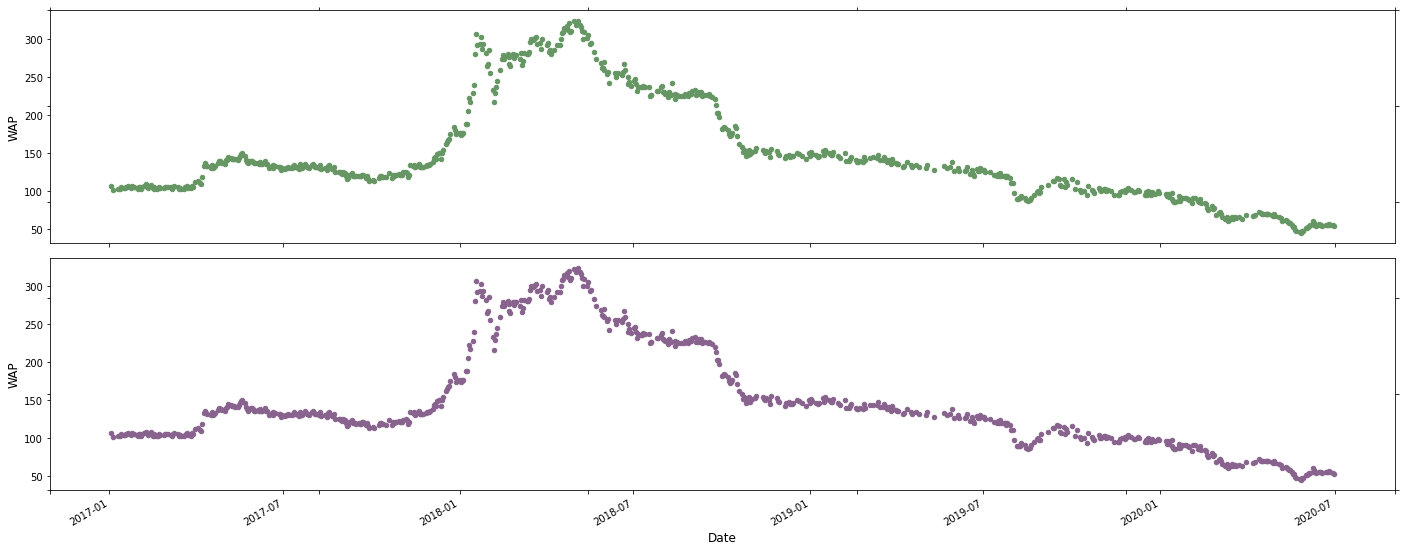

In [22]:
#Plot  stock
# Setting figure properties
params = {'legend.fontsize' : 'large',
         'figure.figsize': (20,8),
         'axes.labelsize': 'large',
         'xtick.labelsize': 'medium',
         'ytick.labelsize': 'medium'}
plt.rcParams.update(params)

# Generate colors using nices seaborn color palette
colors = {"BOM500023": sns.color_palette("Set1", n_colors=8, desat=.5)[2],\
          "BOM500023_MODIFED": sns.color_palette("Set1", n_colors=8, desat=.5)[3]}
#add 2 subplots, 1 for original file and another for Pivot
fig, ax = plt.subplots(2)

BOM500023_df=pd.read_csv('BOM500023.csv')
BOM500023_modified_df=share_price_pivot_df[[i for i in share_price_pivot_df.columns if i=='Date' or 'BOM500023' in i]]
#Plot WAP against Date from original file
ax[0].scatter(pd.DatetimeIndex(BOM500023_df['Date']),
               BOM500023_df['WAP'],
               color=colors['BOM500023'],
               s=20)
#Plot WAP against Date from Pivot df
ax[1].scatter(pd.DatetimeIndex(BOM500023_modified_df['Date']),
               BOM500023_modified_df['WAP_BOM500023'],
               color=colors['BOM500023_MODIFED'],
               s=20)

ax[0].set_xlabel("Date")
ax[0].set_ylabel("WAP")

ax[1].set_xlabel("Date")
ax[1].set_ylabel("WAP")

# Format x-axis to properly displays dates
fig.autofmt_xdate()
#ax.set_xlim(min(pd.DatetimeIndex(BOM500023_modified_df['Date'])), max(pd.DatetimeIndex(BOM500023_modified_df['Date'])))
#ax.set_ylim([-0.1, 1.1])

# Adding another subplot in order to have common y-label
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the common axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)

#plt.xlabel('Date', labelpad=40)
#plt.ylabel('WAP', labelpad=40)

plt.tight_layout()
plt.savefig('fig1.png')
plt.show()
plt.close()

# Observed that there are NaN value for Stock **BOM500023**
# Check what is the best value to replace **NaN**



In [23]:
share_price_pivot_df.describe()

,Open_BOM500002,Open_BOM500003,Open_BOM500008,Open_BOM500009,Open_BOM500010,Open_BOM500012,Open_BOM500013,Open_BOM500014,Open_BOM500020,Open_BOM500023,High_BOM500002,High_BOM500003,High_BOM500008,High_BOM500009,High_BOM500010,High_BOM500012,High_BOM500013,High_BOM500014,High_BOM500020,High_BOM500023,Low_BOM500002,Low_BOM500003,Low_BOM500008,Low_BOM500009,Low_BOM500010,Low_BOM500012,Low_BOM500013,Low_BOM500014,Low_BOM500020,Low_BOM500023,Close_BOM500002,Close_BOM500003,Close_BOM500008,Close_BOM500009,Close_BOM500010,Close_BOM500012,Close_BOM500013,Close_BOM500014,Close_BOM500020,Close_BOM500023,...,Deliverable Quantity_BOM500002,Deliverable Quantity_BOM500003,Deliverable Quantity_BOM500008,Deliverable Quantity_BOM500009,Deliverable Quantity_BOM500010,Deliverable Quantity_BOM500012,Deliverable Quantity_BOM500013,Deliverable Quantity_BOM500014,Deliverable Quantity_BOM500020,Deliverable Quantity_BOM500023,% Deli. Qty to Traded Qty_BOM500002,% Deli. Qty to Traded Qty_BOM500003,% Deli. Qty to Traded Qty_BOM500008,% Deli. Qty to Traded Qty_BOM500009,% Deli. Qty to Traded Qty_BOM500010,% Deli. Qty to Traded Qty_BOM500012,% Deli. Qty to Traded Qty_BOM500013,% Deli. Qty to Traded Qty_BOM500014,% Deli. Qty to Traded Qty_BOM500020,% Deli. Qty to Traded Qty_BOM500023,Spread H-L_BOM500002,Spread H-L_BOM500003,Spread H-L_BOM500008,Spread H-L_BOM500009,Spread H-L_BOM500010,Spread H-L_BOM500012,Spread H-L_BOM500013,Spread H-L_BOM500014,Spread H-L_BOM500020,Spread H-L_BOM500023,Spread C-O_BOM500002,Spread C-O_BOM500003,Spread C-O_BOM500008,Spread C-O_BOM500009,Spread C-O_BOM500010,Spread C-O_BOM500012,Spread C-O_BOM500013,Spread C-O_BOM500014,Spread C-O_BOM500020,Spread C-O_BOM500023
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,860.000000,847.000000,862.000000,708.00000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,860.000000,847.000000,862.000000,708.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,860.000000,847.000000,862.000000,708.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,860.000000,847.000000,862.000000,708.000000,...,8.610000e+02,8.620000e+02,862.000000,8.620000e+02,8.610000e+02,862.000000,8.590000e+02,847.000000,8.610000e+02,694.00000,861.000000,862.000000,862.000000,862.000000,861.000000,862.000000,859.000000,847.000000,861.000000,707.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,860.000000,847.000000,862.000000,708.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,860.000000,847.000000,862.000000,708.000000
mean,1318.044316,209.783237,752.467575,12.500684,1867.782715,44.886427,14.404267,2.301606,134.072854,148.64428,1337.071520,213.656613,761.688109,12.883144,1887.268039,45.986775,14.760093,2.362550,137.628074,152.695268,1296.875928,205.159281,739.999362,12.138097,1844.954814,43.564385,13.986209,2.241677,130.663167,145.346610,1314.492749,209.142111,749.884223,12.475998,1865.474884,44.665777,14.332779,2.298536,133.719664,148.992302,...,2.339226e+04,3.154840e+04,14151.131090,3.951680e+04,1.150852e+05,62081.910673,4.529229e+04,10404.788666,1.923212e+05,1750.53170,39.656585,49.855360,28.989722,88.619675,46.505610,79.625592,66.864237,96.212125,35.959024,68.121909,40.195592,8.497332,21.688747,0.745046,42.313225,2.422390,0.773884,0.120874,6.964907,7.348658,-3.551566,-0.641125,-2.583353,-0.024687,-2.307831,-0.220650,-0.071488,-0.003070,-0.353190,0.348023
std,179.181818,34.539597,97.009205,2.968121,265.365408,16.981238,8.251866,1.058441,75.528575,67.59888,180.977816,34.930429,96.697484,2.964878,265.643530,17.419115,8.424903,1.088818,77.610015,69.518384,178.181400,34.323347,97.970437,2.823847,262.492947,16.496462,7.994816,1.022430,73.577036,65.661248,179.655928,34.638260,96.997963,2.884748,264.695879,16.881493,8.176054,1.050713,75.355898,67.793879,...,4.296416e+05,3.803156e+05,60641.678352,8.067452e+04,2.631610e+05,75927.978382,2.393372e+05,17308.146058,1.706990e+06,8895.23662,21.751157,17.37739

In [24]:
share_price_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Columns: 121 entries, Date to Spread C-O_BOM500023
dtypes: float64(120), object(1)
memory usage: 815.0+ KB


In [25]:
share_price_pivot_df[share_price_pivot_df.Open_BOM500023.isna()]

,Date,Open_BOM500002,Open_BOM500003,Open_BOM500008,Open_BOM500009,Open_BOM500010,Open_BOM500012,Open_BOM500013,Open_BOM500014,Open_BOM500020,Open_BOM500023,High_BOM500002,High_BOM500003,High_BOM500008,High_BOM500009,High_BOM500010,High_BOM500012,High_BOM500013,High_BOM500014,High_BOM500020,High_BOM500023,Low_BOM500002,Low_BOM500003,Low_BOM500008,Low_BOM500009,Low_BOM500010,Low_BOM500012,Low_BOM500013,Low_BOM500014,Low_BOM500020,Low_BOM500023,Close_BOM500002,Close_BOM500003,Close_BOM500008,Close_BOM500009,Close_BOM500010,Close_BOM500012,Close_BOM500013,Close_BOM500014,Close_BOM500020,...,Deliverable Quantity_BOM500002,Deliverable Quantity_BOM500003,Deliverable Quantity_BOM500008,Deliverable Quantity_BOM500009,Deliverable Quantity_BOM500010,Deliverable Quantity_BOM500012,Deliverable Quantity_BOM500013,Deliverable Quantity_BOM500014,Deliverable Quantity_BOM500020,Deliverable Quantity_BOM500023,% Deli. Qty to Traded Qty_BOM500002,% Deli. Qty to Traded Qty_BOM500003,% Deli. Qty to Traded Qty_BOM500008,% Deli. Qty to Traded Qty_BOM500009,% Deli. Qty to Traded Qty_BOM500010,% Deli. Qty to Traded Qty_BOM500012,% Deli. Qty to Traded Qty_BOM500013,% Deli. Qty to Traded Qty_BOM500014,% Deli. Qty to Traded Qty_BOM500020,% Deli. Qty to Traded Qty_BOM500023,Spread H-L_BOM500002,Spread H-L_BOM500003,Spread H-L_BOM500008,Spread H-L_BOM500009,Spread H-L_BOM500010,Spread H-L_BOM500012,Spread H-L_BOM500013,Spread H-L_BOM500014,Spread H-L_BOM500020,Spread H-L_BOM500023,Spread C-O_BOM500002,Spread C-O_BOM500003,Spread C-O_BOM500008,Spread C-O_BOM500009,Spread C-O_BOM500010,Spread C-O_BOM500012,Spread C-O_BOM500013,Spread C-O_BOM500014,Spread C-O_BOM500020,Spread C-O_BOM500023
0,2017-01-02,1045.00,129.00,870.05,7.00,1275.00,21.90,15.50,2.50,49.05,NaN,1052.00,132.45,898.95,7.89,1275.00,22.00,16.08,2.50,49.90,NaN,1035.00,129.00,867.60,7.00,1214.15,21.50,14.86,2.30,48.35,NaN,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,...,1460.0,9551.0,1971.0,30721.0,42019.0,11151.0,65954.0,5628.0,84182.0,NaN,44.15,59.65,12.15,87.01,21.24,77.39,38.58,82.68,27.28,NaN,17.00,3.45,31.35,0.89,60.85,0.50,1.22,0.20,1.55,NaN,-5.05,2.05,26.15,0.09,-55.75,-0.30,-0.20,-0.13,-0.25,NaN
2,2017-01-04,1050.00,134.15,892.00,7.13,1215.25,22.50,15.32,2.48,50.25,NaN,1050.00,134.60,909.25,7.40,1225.00,22.75,15.44,2.50,51.90,NaN,1033.50,131.25,890.00,7.11,1197.55,21.25,15.12,2.35,50.25,NaN,1037.35,131.75,898.50,7.26,1212.50,22.75,15.28,2.47,50.90,...,851.0,14109.0,3564.0,18300.0,539272.0,43833.0,23674.0,2219.0,198646.0,NaN,56.06,61.49,24.11,83.89,92.28,74.31,84.28,96.69,31.95,NaN,16.50,3.35,19.25,0.29,27.45,1.50,0.32,0.15,1.65,NaN,-12.65,-2.40,6.50,0.13,-2.75,0.25,-0.04,-0.01,0.65,NaN
4,2017-01-06,1037.00,132.90,916.35,7.35,1216.55,24.90,15.26,2.36,54.20,NaN,1048.00,133.00,932.15,7.55,1232.40,25.00,15.45,2.45,54.35,NaN,1035.55,129.55,915.00,7.21,1216.55,23.00,15.01,2.35,52.75,NaN,1043.90,130.10,928.05,7.40,1222.15,24.95,15.11,2.45,53.30,...,1256.0,13193.0,2110.0,11660.0,150919.0,118287.0,31945.0,4100.0,106583.0,NaN,58.15,49.28,12.28,85.11,82.03,70.79,73.11,87.23,38.97,NaN,12.45,3.45,17.15,0.34,15.85,2.00,0.44,0.10,1.60,NaN,6.90,-2.80,11.70,0.05,5.60,0.05,-0.15,0.09,-0.90,NaN
5,2017-01-09,1047.95,130.90,931.85,7.50,1232.50,24.95,15.00,2.49,53.70,NaN,1048.00,132.20,935.90,8.88,1232.50,25.60,15.60,2.72,54.85,NaN,1037.00,129.55,900.05,7.15,1213.65,24.05,15.00,2.35,53.35,NaN,1041.95,131.65,903.30,8.88,1222.25,25.10,15.40,2.68,54.20,...,1369.0,9828.0,7026.0,117040.0,9179.0,79762.0,38901.0,3481.0,70217.0,NaN,60.47,55.48,29.92,91.75,28.99,71.24,83.17,96.80,28.99,NaN,11.00,2.65,35.85,1.73,18.85,1.55,0.60,0.37,1.50,NaN,-6.00,0.75,-28.55,1.38,-10.25,0.15,0.40,0.19,0.50,NaN
7,2017-01-11,1166.90,137.00,908.00,9.67,1220.00,26.75,15.40,2.50,54.85,NaN,1169.95,140.00,912.00,9.67,1232.45,26.75,15.74,2.84,55.90,NaN,1102.50,137.00,901.00,9.01,1219.15,25.10,15.10,2.50,54.20,NaN,1132.15,139.15,906.95,9.07,1228.95,26.40,15.20,2.63,55.00,...,10078.0,29947.0,4379.0,49743.0,22716.0,94905.0,31211.0,136

In [26]:
#Forward fill NaN value with previous row value
share_price_ffill_df=share_price_pivot_df.ffill(axis=0,inplace=False)

In [27]:
share_price_ffill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Columns: 121 entries, Date to Spread C-O_BOM500023
dtypes: float64(120), object(1)
memory usage: 815.0+ KB


# Still there is one NaN value, which is first row
# Use Backward fill to fill NaN value with Next day value

In [28]:
share_price_bfill_df=share_price_pivot_df.bfill(axis=0,inplace=False)

In [29]:
share_price_bfill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Columns: 121 entries, Date to Spread C-O_BOM500023
dtypes: float64(120), object(1)
memory usage: 815.0+ KB


In [30]:
#user interpolate linear method to replace NaN values
share_price_linear_df=share_price_pivot_df.interpolate(method='linear')

In [31]:
share_price_linear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Columns: 121 entries, Date to Spread C-O_BOM500023
dtypes: float64(120), object(1)
memory usage: 815.0+ KB


In [32]:
#user interpolate polynomial method to replace NaN values
share_price_poly_df=share_price_pivot_df.interpolate(method='spline',order=2)
share_price_poly_df.info()

/usr/local/lib/python3.6/dist-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Columns: 121 entries, Date to Spread C-O_BOM500023
dtypes: float64(120), object(1)
memory usage: 815.0+ KB


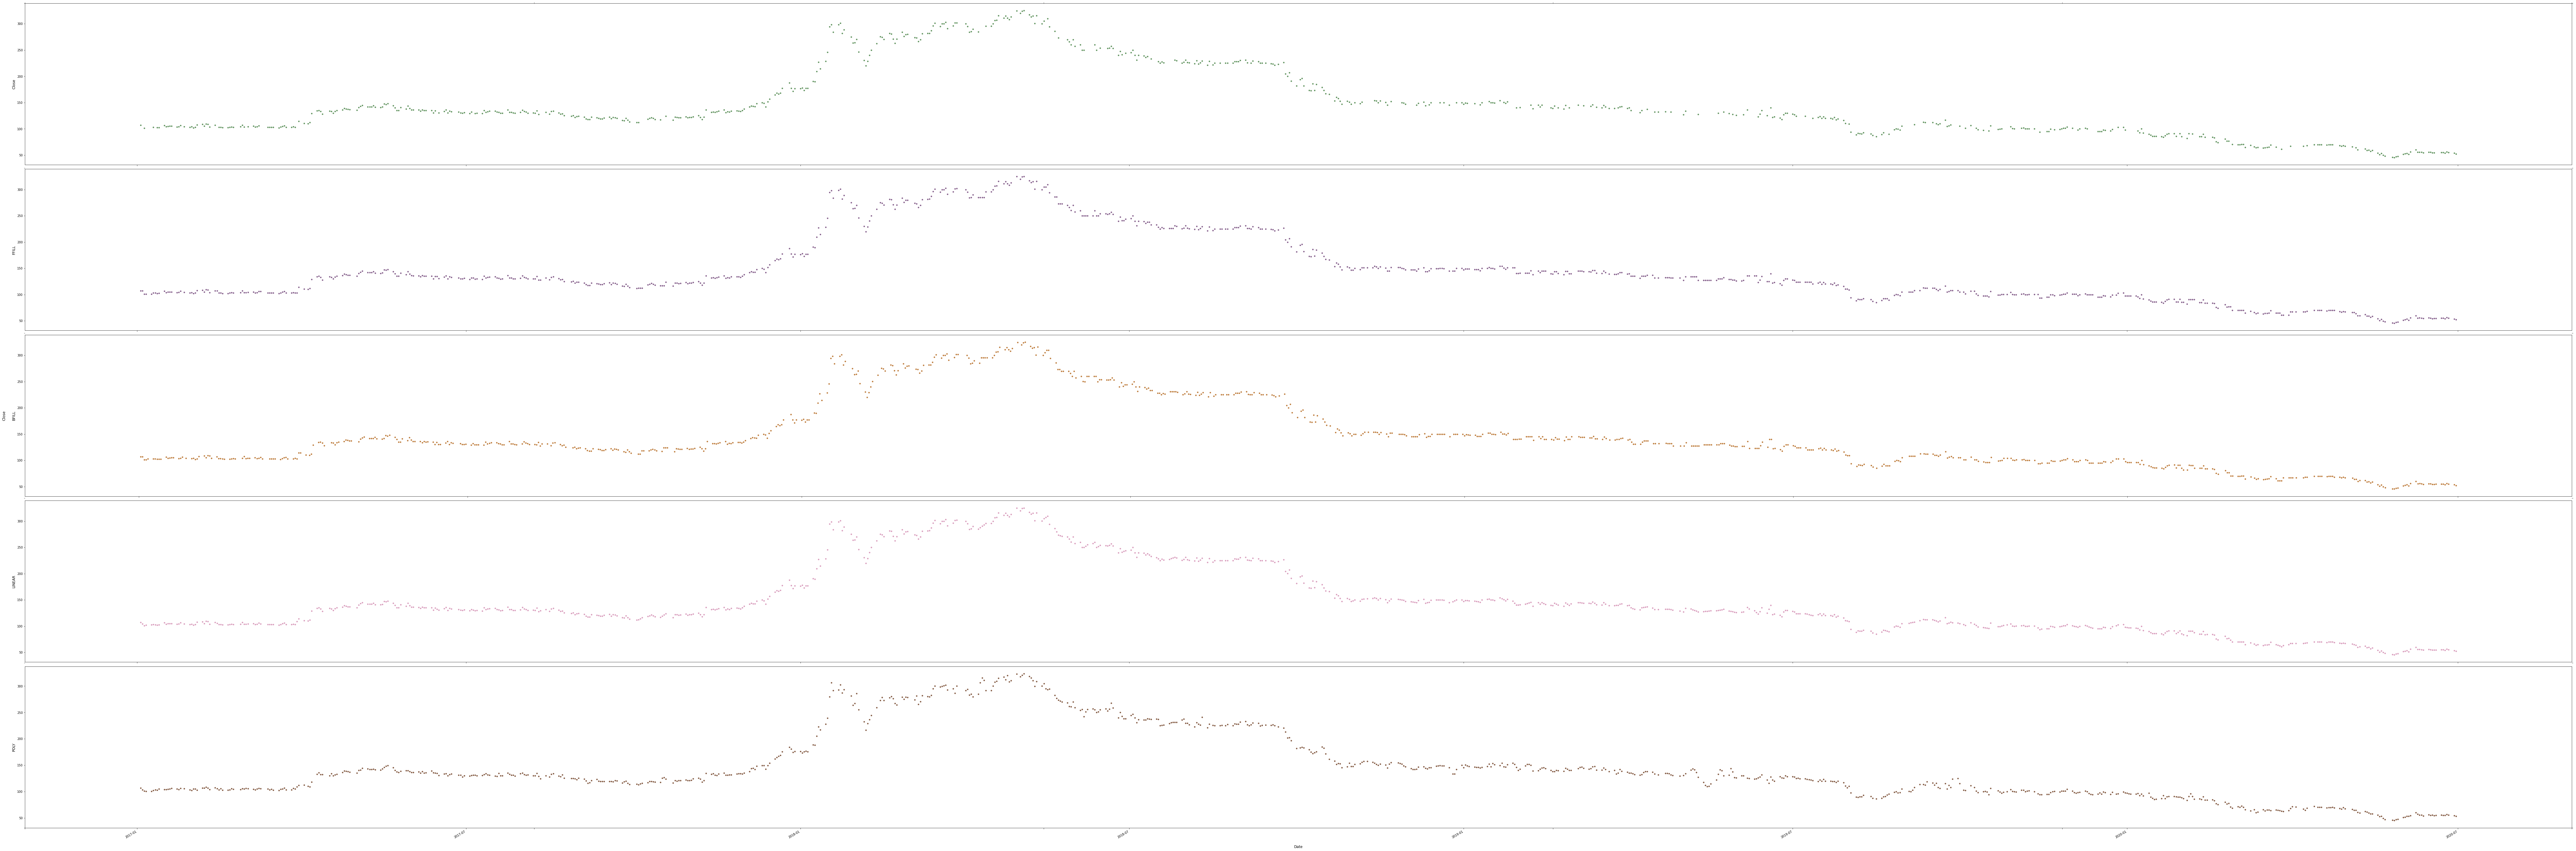

In [33]:
#Plot  stock
# Setting figure properties
params = {'legend.fontsize' : 'large',
         'figure.figsize': (120,40),
         'axes.labelsize': 'large',
         'xtick.labelsize': 'medium',
         'ytick.labelsize': 'medium'}
plt.rcParams.update(params)

# Generate colors using nices seaborn color palette
colors = {"BOM500023": sns.color_palette("Set1", n_colors=8, desat=.5)[2],\
          "BOM500023_FFILL": sns.color_palette("Set1", n_colors=8, desat=.5)[3],\
          "BOM500023_BFILL": sns.color_palette("Set1", n_colors=8, desat=.5)[4],\
          "BOM500023_LINEAR": sns.color_palette("Set1", n_colors=8, desat=.5)[7],\
          "BOM500023_POLY": sns.color_palette("Set1", n_colors=8, desat=.5)[6]}
#add 2 subplots, 1 for original file and another for Pivot
fig, ax = plt.subplots(5)

BOM500023_df=pd.read_csv('BOM500023.csv')
BOM500023_ffill_df=share_price_ffill_df[[i for i in share_price_ffill_df.columns if i=='Date' or 'BOM500023' in i]]
BOM500023_bfill_df=share_price_bfill_df[[i for i in share_price_bfill_df.columns if i=='Date' or 'BOM500023' in i]]
BOM500023_linear_df=share_price_linear_df[[i for i in share_price_linear_df.columns if i=='Date' or 'BOM500023' in i]]
BOM500023_poly_df=share_price_poly_df[[i for i in share_price_poly_df.columns if i=='Date' or 'BOM500023' in i]]
#Plot WAP against Date from original file
ax[0].scatter(pd.DatetimeIndex(BOM500023_df['Date']),
               BOM500023_df['Close'],
               color=colors['BOM500023'],
               s=15)
#Plot WAP against Date from ffile df
ax[1].scatter(pd.DatetimeIndex(BOM500023_ffill_df['Date']),
               BOM500023_ffill_df['Close_BOM500023'],
               color=colors['BOM500023_FFILL'],
               s=15)

ax[2].scatter(pd.DatetimeIndex(BOM500023_bfill_df['Date']),
               BOM500023_bfill_df['Close_BOM500023'],
               color=colors['BOM500023_BFILL'],
               s=15)


ax[3].scatter(pd.DatetimeIndex(BOM500023_linear_df['Date']),
               BOM500023_linear_df['Close_BOM500023'],
               color=colors['BOM500023_LINEAR'],
               s=15)


ax[4].scatter(pd.DatetimeIndex(BOM500023_poly_df['Date']),
               BOM500023_poly_df['WAP_BOM500023'],
               color=colors['BOM500023_POLY'],
               s=15)

ax[0].set_ylabel("Close")
ax[1].set_ylabel("FFILL")
ax[2].set_ylabel("BFILL")
ax[3].set_ylabel("LINEAR")
ax[4].set_ylabel("POLY")

# Format x-axis to properly displays dates
fig.autofmt_xdate()
#ax[0:4].set_xlim(min(pd.DatetimeIndex(BOM500023_poly_df['Date'])), max(pd.DatetimeIndex(BOM500023_poly_df['Date'])))
#ax.set_ylim([-0.1, 1.1])

# Adding another subplot in order to have common y-label
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the common axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)

plt.xlabel('Date', labelpad=40)
plt.ylabel('Close', labelpad=40)

plt.tight_layout()
plt.savefig('fig2.png')
plt.show()
plt.close()

In [34]:
# based on above observation,we can not decide which is best method to fill NAN values, so we leave it to algorithm to fill missing values
#share_price_pivot_df.interpolate(method='spline',order=2,inplace=True)

In [35]:
#Read NASDL csv File
nasdl_df=pd.read_csv('nasdl.csv')

In [36]:
#Checking for any Null values
nasdl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          841 non-null    object 
 1   Gross Purchases(Rs Crore)     841 non-null    float64
 2   Gross Sales(Rs Crore)         841 non-null    float64
 3   Net Investment (Rs Crore)     841 non-null    float64
 4   Net Investment US($) million  841 non-null    float64
 5   Conversion (1 USD to INR)     841 non-null    float64
dtypes: float64(5), object(1)
memory usage: 39.5+ KB


In [37]:
nasdl_df.head()

,Date,Gross Purchases(Rs Crore),Gross Sales(Rs Crore),Net Investment (Rs Crore),Net Investment US($) million,Conversion (1 USD to INR)
0,2020-06-30,5411.14,5512.32,-101.18,-13.39,75.5680
1,2020-06-29,4723.40,5706.64,-983.24,-130.27,75.4757
2,2020-06-26,6418.92,6906.27,-487.35,-64.43,75.6349
3,2020-06-25,6681.00,5791.03,889.97,117.55,75.7087
4,2020-06-24,5041.59,4912.04,129.55,17.10,75.7549


In [38]:
#changing Index name to None 
nasdl_df.columns.name = None
nasdl_df.head()

,Date,Gross Purchases(Rs Crore),Gross Sales(Rs Crore),Net Investment (Rs Crore),Net Investment US($) million,Conversion (1 USD to INR)
0,2020-06-30,5411.14,5512.32,-101.18,-13.39,75.5680
1,2020-06-29,4723.40,5706.64,-983.24,-130.27,75.4757
2,2020-06-26,6418.92,6906.27,-487.35,-64.43,75.6349
3,2020-06-25,6681.00,5791.03,889.97,117.55,75.7087
4,2020-06-24,5041.59,4912.04,129.55,17.10,75.7549


In [39]:
#Rename column names
nasdl_df.columns=['Date','Gross_Purchases','Gross_Sales','Net_Investment_INR','Net_Investment_USD','Conversion_Rate']

In [40]:
nasdl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                841 non-null    object 
 1   Gross_Purchases     841 non-null    float64
 2   Gross_Sales         841 non-null    float64
 3   Net_Investment_INR  841 non-null    float64
 4   Net_Investment_USD  841 non-null    float64
 5   Conversion_Rate     841 non-null    float64
dtypes: float64(5), object(1)
memory usage: 39.5+ KB


In [41]:
#merge stock price and nasdl dataframes
result_df=pd.merge(share_price_pivot_df
                   ,nasdl_df
                   ,left_on='Date'
                   ,right_on='Date'
                   ,how= 'left')

In [42]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Columns: 126 entries, Date to Conversion_Rate
dtypes: float64(125), object(1)
memory usage: 855.3+ KB


In [43]:
print(result_df.shape)
#validate after left join, rows is same as left DF, which is share_price_pivot_df
assert share_price_pivot_df.shape[0] == result_df.shape[0]
assert share_price_pivot_df.shape[1]+nasdl_df.shape[1]-1 == result_df.shape[1]

(862, 126)


In [44]:
#prin the resulting DF head
print(result_df.head())

         Date  Open_BOM500002  ...  Net_Investment_USD  Conversion_Rate
0  2017-01-02          1045.0  ...              -83.29          67.9547
1  2017-01-03          1069.9  ...              -46.85          68.0225
2  2017-01-04          1050.0  ...              -78.84          68.0864
3  2017-01-05          1051.9  ...             -101.50          68.1791
4  2017-01-06          1037.0  ...               -5.77          67.7884

[5 rows x 126 columns]


In [45]:
#there are 6 Null Rows for conversion_rate
result_df[result_df.Conversion_Rate.isna()]

,Date,Open_BOM500002,Open_BOM500003,Open_BOM500008,Open_BOM500009,Open_BOM500010,Open_BOM500012,Open_BOM500013,Open_BOM500014,Open_BOM500020,Open_BOM500023,High_BOM500002,High_BOM500003,High_BOM500008,High_BOM500009,High_BOM500010,High_BOM500012,High_BOM500013,High_BOM500014,High_BOM500020,High_BOM500023,Low_BOM500002,Low_BOM500003,Low_BOM500008,Low_BOM500009,Low_BOM500010,Low_BOM500012,Low_BOM500013,Low_BOM500014,Low_BOM500020,Low_BOM500023,Close_BOM500002,Close_BOM500003,Close_BOM500008,Close_BOM500009,Close_BOM500010,Close_BOM500012,Close_BOM500013,Close_BOM500014,Close_BOM500020,...,Deliverable Quantity_BOM500012,Deliverable Quantity_BOM500013,Deliverable Quantity_BOM500014,Deliverable Quantity_BOM500020,Deliverable Quantity_BOM500023,% Deli. Qty to Traded Qty_BOM500002,% Deli. Qty to Traded Qty_BOM500003,% Deli. Qty to Traded Qty_BOM500008,% Deli. Qty to Traded Qty_BOM500009,% Deli. Qty to Traded Qty_BOM500010,% Deli. Qty to Traded Qty_BOM500012,% Deli. Qty to Traded Qty_BOM500013,% Deli. Qty to Traded Qty_BOM500014,% Deli. Qty to Traded Qty_BOM500020,% Deli. Qty to Traded Qty_BOM500023,Spread H-L_BOM500002,Spread H-L_BOM500003,Spread H-L_BOM500008,Spread H-L_BOM500009,Spread H-L_BOM500010,Spread H-L_BOM500012,Spread H-L_BOM500013,Spread H-L_BOM500014,Spread H-L_BOM500020,Spread H-L_BOM500023,Spread C-O_BOM500002,Spread C-O_BOM500003,Spread C-O_BOM500008,Spread C-O_BOM500009,Spread C-O_BOM500010,Spread C-O_BOM500012,Spread C-O_BOM500013,Spread C-O_BOM500014,Spread C-O_BOM500020,Spread C-O_BOM500023,Gross_Purchases,Gross_Sales,Net_Investment_INR,Net_Investment_USD,Conversion_Rate
35,2017-02-21,1219.10,206.50,864.00,8.61,1395.00,27.00,15.95,2.32,57.40,105.50,1230.70,210.00,867.00,9.60,1414.00,27.35,15.95,2.70,60.95,105.50,1212.95,201.80,856.95,8.61,1389.75,26.30,15.05,2.32,56.75,103.00,1221.60,203.25,859.70,9.54,1411.95,27.05,15.35,2.67,59.75,...,22236.0,27517.0,6859.0,168564.0,9.0,36.00,32.60,31.38,96.93,35.87,76.93,74.01,93.14,19.11,90.00,17.75,8.20,10.05,0.99,24.25,1.05,0.90,0.38,4.20,2.50,2.50,-3.25,-4.30,0.93,16.95,0.05,-0.60,0.35,2.35,-2.50,NaN,NaN,NaN,NaN,NaN
39,2017-02-28,1207.00,206.10,863.85,9.40,1375.00,26.80,14.90,2.50,57.25,104.00,1215.00,207.95,874.65,9.46,1384.00,27.75,15.45,2.70,60.20,107.20,1195.00,198.50,857.00,9.08,1367.50,26.80,14.90,2.50,57.25,104.00,1199.90,201.45,858.50,9.08,1368.80,27.35,15.00,2.53,58.75,...,51658.0,45847.0,37837.0,88791.0,235.0,39.43,38.56,33.49,97.10,73.64,71.14,82.01,92.09,23.17,37.01,20.00,9.45,17.65,0.38,16.50,0.95,0.55,0.20,2.95,3.20,-7.10,-4.65,-5.35,-0.32,-6.20,0.55,0.10,0.03,1.50,3.20,NaN,NaN,NaN,NaN,NaN
58,2017-03-28,1194.95,211.00,864.15,12.80,1474.80,25.05,15.05,2.66,88.60,103.10,1195.20,211.00,875.10,12.80,1505.80,26.25,15.50,3.07,90.65,106.75,1182.10,203.65,863.35,12.80,1474.80,25.00,15.05,2.66,86.65,103.10,1190.65,205.45,871.10,12.80,1503.80,25.80,15.15,2.81,87.45,...,54034.0,15529.0,16531.0,367525.0,250.0,63.13,29.35,40.79,100.00,96.55,76.34,72.48,95.11,16.07,100.00,13.10,7.35,11.75,0.00,31.00,1.25,0.45,0.41,4.00,3.65,-4.30,-5.55,6.95,0.00,29.00,0.75,0.10,0.15,-1.15,0.90,NaN,NaN,NaN,NaN,NaN
86,2017-05-10,1543.00,187.40,883.70,11.10,1530.95,29.10,32.70,4.45,83.90,142.00,1619.45,189.50,902.00,11.72,1575.00,29.45,32.90,4.45,86.20,142.00,1532.00,184.30,883.60,11.10,1528.55,28.05,29.70,4.10,83.55,141.00,1598.80,184.90,897.70,11.44,1572.80,28.85,30.50,4.19,84.95,...,39285.0,150785.0,17365.0,160455.0,250.0,19.40,41.76,25.31,100.00,48.97,74.06,35.92,76.20,26.29,99.60,87.45,5.20,18.40,0.62,46.45,1.40,3.20,0.35,2.65,1.00,55.80,-2.50,14.00,0.34,41.85,-0.25,-2.20,-0.26,1.05,0.00,NaN,NaN,NaN,NaN,NaN
155,2017-08-17,1360.85,188.50,817.10,7.35,1749.45,27.95,25.00,3.50,75.05,133.80,1374.00,189.50,819.90,7.80,1765.00,27.95,25.00,3.53,80.15,137.90,1351.00,187.50,805.05,7.25,1721.00,27.50,23.30,3.25,75.05,129.00,1368.60,188.55,807.45,7.57,1758.15,27.60,23.60,3.53,78.70,...,52856.0,18556.0,11364.0,95835.0,335.0,17.07,54.33,49.63,89.29,44.54,82.18,37.08,100.00,15.27,70.08,23.00,2.00,14.85,

In [46]:
#Not to fill na values now, will be done by algorithm
#Use forward linear to fill NaN values
#result_df.interpolate(method='linear',inplace=True)
#result_df.info()


In [50]:
#read DowJoanes Index csv file
dji_df=pd.read_csv('DJI.csv')
dji_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       879 non-null    object 
 1   High       879 non-null    float64
 2   Low        879 non-null    float64
 3   Open       879 non-null    float64
 4   Close      879 non-null    float64
 5   Volume     879 non-null    int64  
 6   Adj Close  879 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 48.2+ KB


In [51]:
dji_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,19938.529297,19775.929688,19872.859375,19881.759766,339180000,19881.759766
1,2017-01-04,19956.140625,19878.830078,19890.939453,19942.160156,280010000,19942.160156
2,2017-01-05,19948.599609,19811.119141,19924.560547,19899.289062,269920000,19899.289062
3,2017-01-06,19999.630859,19834.080078,19906.960938,19963.800781,277700000,19963.800781
4,2017-01-09,19943.779297,19887.380859,19931.410156,19887.380859,287510000,19887.380859


In [52]:
#merge result and dji dataframes
final_df=pd.merge(result_df
                   ,dji_df
                   ,left_on='Date'
                   ,right_on='Date'
                   ,how= 'left')

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Columns: 132 entries, Date to Adj Close
dtypes: float64(131), object(1)
memory usage: 895.7+ KB


In [55]:
print(final_df.shape)
#validate after left join, now if rows is same as left DF, which is result_df
assert result_df.shape[0] == final_df.shape[0]
assert result_df.shape[1]+dji_df.shape[1]-1 == final_df.shape[1]

(862, 132)


In [56]:
#Check rows where Dowjoanes.close is NaN
final_df[final_df.Close.isna()]

,Date,Open_BOM500002,Open_BOM500003,Open_BOM500008,Open_BOM500009,Open_BOM500010,Open_BOM500012,Open_BOM500013,Open_BOM500014,Open_BOM500020,Open_BOM500023,High_BOM500002,High_BOM500003,High_BOM500008,High_BOM500009,High_BOM500010,High_BOM500012,High_BOM500013,High_BOM500014,High_BOM500020,High_BOM500023,Low_BOM500002,Low_BOM500003,Low_BOM500008,Low_BOM500009,Low_BOM500010,Low_BOM500012,Low_BOM500013,Low_BOM500014,Low_BOM500020,Low_BOM500023,Close_BOM500002,Close_BOM500003,Close_BOM500008,Close_BOM500009,Close_BOM500010,Close_BOM500012,Close_BOM500013,Close_BOM500014,Close_BOM500020,...,% Deli. Qty to Traded Qty_BOM500003,% Deli. Qty to Traded Qty_BOM500008,% Deli. Qty to Traded Qty_BOM500009,% Deli. Qty to Traded Qty_BOM500010,% Deli. Qty to Traded Qty_BOM500012,% Deli. Qty to Traded Qty_BOM500013,% Deli. Qty to Traded Qty_BOM500014,% Deli. Qty to Traded Qty_BOM500020,% Deli. Qty to Traded Qty_BOM500023,Spread H-L_BOM500002,Spread H-L_BOM500003,Spread H-L_BOM500008,Spread H-L_BOM500009,Spread H-L_BOM500010,Spread H-L_BOM500012,Spread H-L_BOM500013,Spread H-L_BOM500014,Spread H-L_BOM500020,Spread H-L_BOM500023,Spread C-O_BOM500002,Spread C-O_BOM500003,Spread C-O_BOM500008,Spread C-O_BOM500009,Spread C-O_BOM500010,Spread C-O_BOM500012,Spread C-O_BOM500013,Spread C-O_BOM500014,Spread C-O_BOM500020,Spread C-O_BOM500023,Gross_Purchases,Gross_Sales,Net_Investment_INR,Net_Investment_USD,Conversion_Rate,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,1045.00,129.00,870.05,7.00,1275.00,21.90,15.50,2.50,49.05,NaN,1052.00,132.45,898.95,7.89,1275.00,22.00,16.08,2.50,49.90,NaN,1035.00,129.00,867.60,7.00,1214.15,21.50,14.86,2.30,48.35,NaN,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,...,59.65,12.15,87.01,21.24,77.39,38.58,82.68,27.28,NaN,17.00,3.45,31.35,0.89,60.85,0.50,1.22,0.20,1.55,NaN,-5.05,2.05,26.15,0.09,-55.75,-0.30,-0.20,-0.13,-0.25,NaN,2230.64,2796.67,-566.03,-83.29,67.9547,NaN,NaN,NaN,NaN,NaN,NaN
10,2017-01-16,1125.00,140.70,902.00,9.39,1245.00,25.50,15.15,2.56,53.70,101.80,1139.95,140.70,905.60,9.39,1262.75,26.00,15.55,2.69,54.45,106.50,1118.05,134.60,889.35,8.40,1243.00,24.75,15.10,2.56,52.95,101.80,1124.45,135.65,894.45,8.75,1255.85,25.55,15.45,2.61,54.00,...,46.13,15.26,87.21,44.65,83.46,70.11,95.69,17.84,40.66,21.90,6.10,16.25,0.99,19.75,1.25,0.45,0.13,1.50,4.70,-0.55,-5.05,-7.55,-0.64,10.85,0.05,0.30,0.05,0.30,4.70,3237.72,3341.02,-103.30,-15.14,68.2310,NaN,NaN,NaN,NaN,NaN,NaN
34,2017-02-20,1235.00,197.00,857.00,9.00,1408.00,27.00,15.05,2.74,56.75,103.05,1236.90,207.40,866.00,9.10,1410.00,27.25,15.50,2.87,57.90,107.95,1224.45,197.00,856.00,8.81,1387.50,26.00,15.05,2.65,54.00,101.80,1226.65,205.60,863.35,8.86,1394.25,27.00,15.25,2.65,57.00,...,27.61,52.56,98.66,31.97,75.06,81.76,91.84,11.27,76.72,12.45,10.40,10.00,0.29,22.50,1.25,0.45,0.22,3.90,6.15,-8.35,8.60,6.35,-0.14,-13.75,0.00,0.20,-0.09,0.25,-0.70,13273.05,5214.93,8058.12,1201.87,67.0467,NaN,NaN,NaN,NaN,NaN,NaN
99,2017-05-29,1551.00,199.00,867.00,9.27,1545.00,26.00,26.00,4.01,73.80,146.00,1551.00,203.00,867.00,9.90,1601.60,26.20,26.45,4.21,73.95,147.00,1456.25,193.80,843.50,9.27,1545.00,25.10,24.00,3.85,70.15,137.80,1467.55,199.85,857.20,9.79,1598.80,25.20,24.30,4.21,70.60,...,39.85,38.38,100.00,87.26,74.61,42.71,100.00,21.21,84.72,94.75,9.20,23.50,0.63,56.60,1.10,2.45,0.36,3.80,9.20,-83.45,0.85,-9.80,0.52,53.80,-0.80,-1.70,0.20,-3.20,-8.20,4489.50,4736.03,-246.53,-38.17,64.5945,NaN,NaN,NaN,NaN,NaN,NaN
124,2017-07-04,1450.00,190.40,841.05,8.72,1622.05,25.90,30.10,3.64,85.15,129.00,1470.00,190.40,858.00,8.98,1645.70,27.45,31.00,3.64,85.75,132.00,1446.05,185.50,831.50,8.70,1616.55,25.20,28.50,3.40,82.90,127.30,1449.90,188.85,855.15,8.91,1640.40,27.15,29.05,3.45,83.35,...,85.80,33.45,74.66,38.20,81.77,43.04,100.00,24.13,9.02,23.95,4.90,26.50,0.28,29.15,2.25,2.50,0.24,2.85,4.70,-0.10,-1.55,14.10,0.19,18.35,1.25,-1.05,-0.19,-1.80,2.95,3526.82,4241.16,-714.34,-110.31,64.7525,NaN,NaN,NaN,NaN,NaN,NaN
166,2017-09-04,1339.95,188.50,804.50,7.61,1760.00,28.85,27.00

In [57]:
#use ffill to replace NaN values
final_df.interpolate(method='linear',inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Columns: 132 entries, Date to Adj Close
dtypes: float64(131), object(1)
memory usage: 895.7+ KB


In [58]:
final_df.to_csv('FinalStockData.csv')

In [59]:
#pointing the path to google drive folder
%cd '/content/drive/My Drive/Springboard/data'
!ls

/content/drive/My Drive/Springboard/data
BOM500002.csv  BOM500013.csv  fig2.png
BOM500003.csv  BOM500014.csv  FinalStockData.csv
BOM500008.csv  BOM500020.csv  interpolating-timeseries-p1-pandas-fig1.png
BOM500009.csv  BOM500023.csv  nasdl.csv
BOM500010.csv  DJI.csv
BOM500012.csv  fig1.png
